$\newcommand{\ket}[1]{|#1\rangle}$

In [1]:
import math
import random
import matplotlib.pyplot as plt
plt.style.use("default")

In [2]:
class Qubit: #qubit python osztály
    def __init__(self, theta):
        self.theta = theta
    def measure(self): #ezzel a függvénnyel megmérhetjük a qubitet a Z tengely mentén
        p0 = math.cos(self.theta / 2)**2
        roll = random.uniform(0, 1)
        if roll < p0:
            self.theta = 0
            return 0
        else:
            self.theta = math.pi
            return 1
    def rotate(self, angle): #ezzel a függvénnyel elforgathatjuk a qubit állapotot a Bloch gömbön
        self.theta = self.theta + angle
        
    def visualize(self, N = 100, ax = None, return_ax = False, **kwargs):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize = (5, 5))
        ax.set_aspect(1)
        phi = [2 * math.pi * i / (N - 1) for i in range(N)]
        arc = [self.theta * i / (N - 1) for i in range(N)]
        xcircle = [math.cos(p) for p in phi]
        ycircle = [math.sin(p) for p in phi]
        xarc = [0.3 * math.sin(p) for p in arc]
        yarc = [0.3 * math.cos(p) for p in arc]
        ax.plot(xcircle, ycircle, zorder = 0)
        ax.plot([-1, 1], [0,0], c = "black", ls = "--", zorder = 0, lw = 1)
        ax.plot([0, 0], [-1,1], c = "black", ls = "--", zorder = 0, lw = 1)
        ax.plot(xarc, yarc, c = "C1", zorder = 5, label = r"$\theta = %.2f \pi$" % (self.theta / math.pi))
        ax.plot([0, math.sin(self.theta)], [0, math.cos(self.theta)], c = "black", zorder = 5)
        ax.set_ylim(-1.4, 1.4)
        ax.set_xlim(-1.4, 1.4)
        ax.set(**kwargs)
        ax.axis("off")
        ax.scatter(math.sin(self.theta), math.cos(self.theta), c = "r", s = 100, zorder = 10, label = r"$|\psi\rangle$")
        ax.text(-0.09, 1.1, r"$|0\rangle$", size = 14)
        ax.text(-0.09, -1.2, r"$|1\rangle$", size = 14)
        ax.legend()
        if return_ax:
            return ax

# Kvantum tomográfia

A kvantum tomográfia célja a kvantumállapot rekonstruálása mérések segítségével. Kvantummechanikai rendszerek állapotát egy hullámfüggvény adja meg, amit matematikailag komplex számokkal lehet leírni.

$$|\psi\rangle = \alpha_0 \ket{0} + \alpha_1 \ket{1} + \ldots + \alpha_{n - 1} \ket{n - 1}, \ \alpha_i \in \mathbb{C}$$

Általában a cél ezeknek a komplex számoknak a megbecslése különböző mérések elvégzésével. Az egyszerűség kedvéjért mi csak kétállapotú rendszerekkel, qubitekkel fogunk foglalkozni.


## 1. Egy qubit állapotok

A qubit egy kétállapotú kvantumrendszer. A qubit kétállapotú, mert egy mérésnek csupán két kimenetele lehet, amiket a $\ket{0}$ és $\ket{1}$ szimbólumokkal fogunk jelölni. A kvantummechanika megengedi, hogy a qubit ezeknek az állapotoknak a szuperpozíciójában legyen, ezért a qubit hullám függvénye megadható két komplex szám segítségével
$$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}.$$
$|\alpha|^2$ és $|\beta|^2$ megadja annak a valószínűségét hogy a qubit az $\ket{0}$ vagy az $\ket{1}$ állapotban található. Mivel a qubitet mindig vagy a $\ket{0}$ vagy az $\ket{1}$ állapotban találjuk ezért $|\alpha|^2 + |\beta|^2 = 1$. Ez hasonlít arra, hogy $\cos^2(x) + \sin^2(x) = 1$. Ha $\alpha$ és $\beta$ valós számok lennének, megtehetnénk a azt a helyettesítést, hogy $\alpha = \cos(\theta/2)$ és $\beta = \sin(\theta/2)$. Az általános komplex esetben is nagyon hasonló a helyzet, akkor $\alpha = \cos(\theta/2)$ és $\beta = e^{i\phi}\sin(\theta/2)$. Azaz egy tetszőleges qubit állapot megadható két egyszerű szög segítségével. Ez lehetővé teszi, hogy a qubit állapotokat ábrázoljuk egy gömb felületén a következő módon:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/220px-Bloch_sphere.svg.png)

Ez az úgy nevezett Bloch gömb. Továbbiakban csak az $z-x$ síkban található állapotokkal fogunk foglalkozni, ezzel megkerüljük a komplex számok használatát. Ilyenkor a qubit állapotok egy kör pontjaival azonosíthatóak.

![](https://github.com/gubazoltan/KvantumSzakkor_2022/blob/master/Bloch_sphere_real2.png?raw=true)

### Feladat
Add meg az alábbi állapotok szögét a Bloch-körön!
* $\ket{0}$

* $\ket{1}$

* $\frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}$

* $\frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}$

### Megoldás

A szögek sorrendben

0, $\pi$, $\frac{\pi}{2}$, $\frac{3 \pi}{2}$

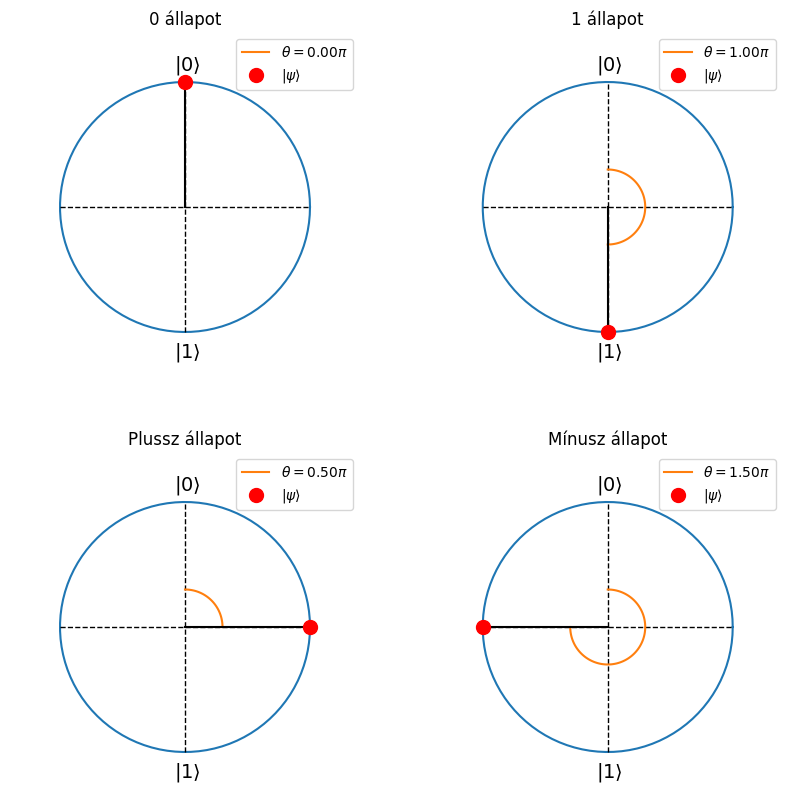

In [3]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
qubit0 = Qubit(0)
qubit1 = Qubit(math.pi)
qubit_plus = Qubit(math.pi/2)
qubit_minus = Qubit(3 * math.pi / 2)
qubit0.visualize(ax = ax[0, 0], title = "0 állapot")
qubit1.visualize(ax = ax[0, 1], title = "1 állapot")
qubit_plus.visualize(ax = ax[1, 0], title = "Plussz állapot")
qubit_minus.visualize(ax = ax[1, 1], title = "Mínusz állapot")

## 2. Mérés a kvantummechanikában

A kvantumszámítógépek esetében általában van egy kitüntetett bázis (tengely, ha Bloch gömbön képzeljük el az állapotokat), ami mentén végezhetünk méréseket. Mindig van két állapot ami ezzel a tengellyel párhuzamos, az úgy nevezett számítási bázis állapotok. Ezeknek az állapotoknak a szuperpozíciójával bármely másik állapot megadható. Általában a számítási bázist a Bloch gömb $z$-tengelyével párhuzamos állapotok alkotják, azaz a $\ket{0}$ és az $\ket{1}$ állapot.

Qubit0 a 0 állapotban található.
Qubit1 a 1 állapotban található.


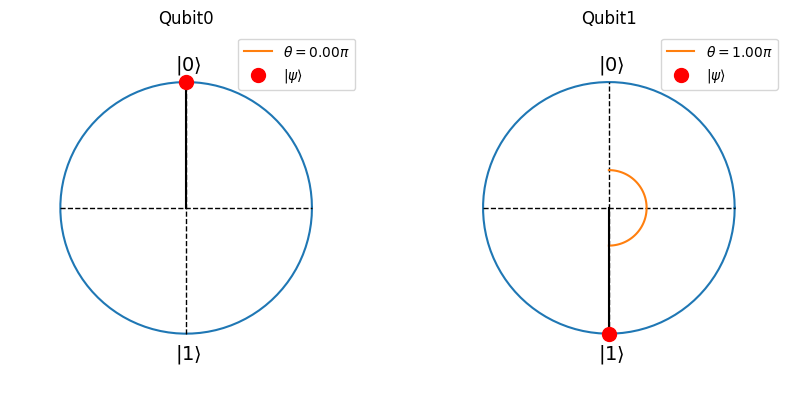

In [4]:
fig1, ax1 = plt.subplots(1, 2, figsize = (10, 5))
print("Qubit0 a %d állapotban található." % qubit0.measure())
print("Qubit1 a %d állapotban található." % qubit1.measure())
qubit0.visualize(ax = ax1[0], title = "Qubit0")
qubit1.visualize(ax = ax1[1], title = "Qubit1")

Mi van ha a qubit egy szuperpozícióban van?

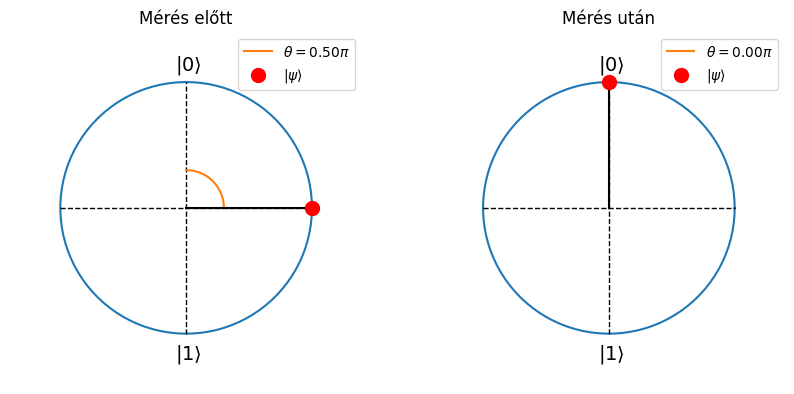

In [5]:
qubitR = Qubit(math.pi/2)
fig2, ax2 = plt.subplots(1, 2, figsize = (10, 5))
qubitR.visualize(ax = ax2[0], title = "Mérés előtt")
qubitR.measure()
qubitR.visualize(ax = ax2[1], title = "Mérés után")

 A mérés eredménye véletlenszerű. A $\ket{0}$ és $\ket{1}$ állapotok valászínűségét a $\theta$ szög függvényében meg lehet adni.
 $$P(\ket{0}) = \cos^2(\theta/2) = 1/2$$
 $$P(\ket{1}) = \sin^2(\theta/2) = 1/2$$
 
Fontos megjegyezni, hogy mérés után a qubit mindig a mérés tenegelyével párhuzamos állapotba kerül. A mérés megváltoztatja a qubit állapotát!

Eddig csak a $z$ tengely mentén mértünk mindig, mert a `Qubit` osztály `measure` függvénye csak a $z$ tengely mentén tud mérni. Hogyan lehet más tengely mentén is mérni? Ezt meg lehet tenni a qubit forgatásával.

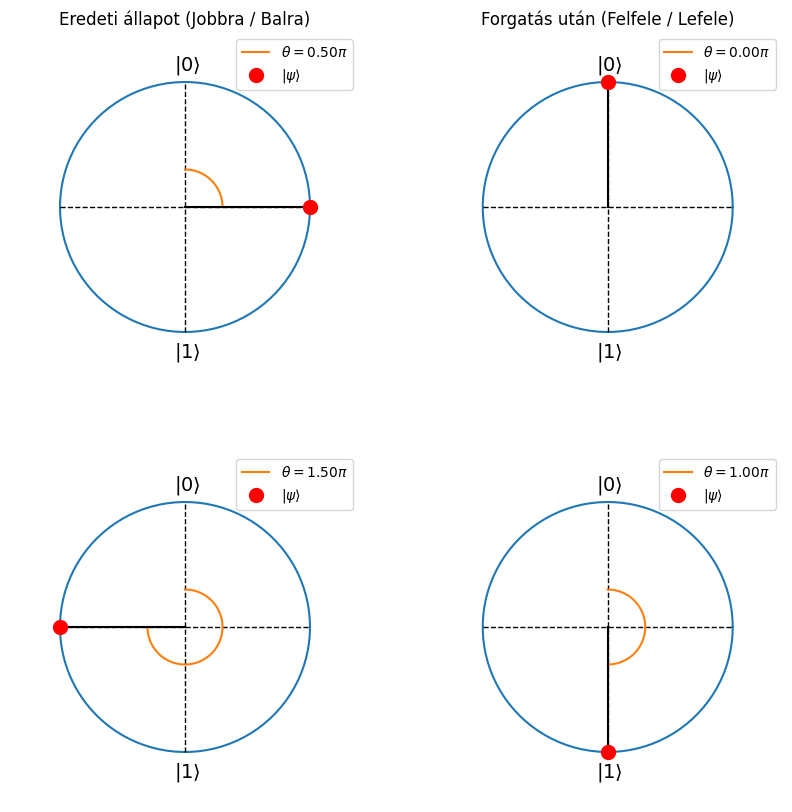

In [6]:
qubitR = Qubit(math.pi/2)
fig3, ax3 = plt.subplots(2, 2, figsize = (10, 10))
qubitR.visualize(ax = ax3[0, 0], title = "Eredeti állapot (Jobbra / Balra)")
qubitR.rotate(-math.pi / 2)
qubitR.visualize(ax = ax3[0, 1], title = "Forgatás után (Felfele / Lefele)")
qubitL = Qubit(3 * math.pi / 2)
qubitL.visualize(ax = ax3[1, 0])
qubitL.rotate(-math.pi/2)
qubitL.visualize(ax = ax3[1, 1])

Ha az állapot eredetileg a jobbra mutatott akkor forgatás után felfele fog mutatni, és ha balra mutatott akkor forgatás után lefele fog mutatani. Ha megmérjük az a forgatás utánni állapotot az éppen olyan mintha az eredeti állapotot a jobbra és balra mutató vektorok bázisán mértük volna meg. Tehát 
$$\text{forgatás } -90^0 \text{-al és mérés a } z \text{-tengely mentén} = \text{mérés az } x \text{-tengely mentén}.$$

Ez általánosítható egy tetszőleges tengelyre, ami a $z$ tengellyel $\theta$ szöget zár be.
$$\text{forgatás } -\theta \text{-val és mérés a } z \text{-tengely mentén} = \text{mérés a } \cos\theta \hat{z} + \sin\theta \hat{x} \text{ tengely mentén}.$$

## 3.  Egy qubit állapot tomográfia

Fontos tulajdonsága a kvantummechanikának, hogy a mérés megváltoztatja a kvantumállapotot és ezért a hullámfüggvény közvetlenül nem mérhető. Általában a kvantum tomográfiát akkor lehet használni, ha a vizsgált kvantumrendszernek több példánya is adott. A valóságban ezek a példányok nem pontosan azonosak, ezért a tomográfia eredménye egy átlagolt kvantumállapot, egy úgynevezett kevert állapot. A továbbiakban mi az egy qubit állapotok tomográfiájával fogunk foglalkozni és feltétellezük, hogy a vizsgált egy qubit állapot példányai tökéletesen azonosak.

Tegyük fel, hogy adott valahány qubit azonos állapotban, amit egy $\theta \in [0,2\pi)$ szöggel adthatunk meg
$$\ket{\psi} = \cos(\theta/2) \ket{0} + \sin(\theta/2) \ket{1}$$

![](https://github.com/gubazoltan/KvantumSzakkor_2022/blob/master/Bloch_sphere_real2.png?raw=true)

Az állapot $z$-tengelyre vett vetületét megbecsülhetjük egyszerűen a következő módon:
1. Mérjük meg N qubitet a z-tengely mentén.

2. Számoljuk meg, hogy hány állopotot találtunk a $\ket{0}$ és az $\ket{1}$ állapotokban, jelöljük ezeket a számokat $N_0$-val és $N_1$-el.

3. Becsüljük meg a vetület értékét $z_\psi \approx \frac{N_0 - N_1}{N}$

A harmadik pontot egyszerű bebizonyítani a valószínűség számítás eszközeivel. Annak a valószínűsége, hogy egy mérés után a qubitet a $\ket{0}$ állapotban találjuk $\cos^2(\theta/2)$, és annak a valószínűsége, hogy az $\ket{1}$ állapotban találjuk $\sin^2(\theta/2)$. Ezért várhatóan a qubiteket $\cos^2(\theta/2)$-vel arányos számban fogjuk a $\ket{0}$ állapotban találni és $\sin^2(\theta/2)$-vel arányos számban az $\ket{1}$ állapotban.

$$\cos^2(\theta/2) \approx \frac{N_0}{N},$$

$$\sin^2(\theta/2) \approx \frac{N_1}{N},$$

$$\frac{N_0 - N_1}{N} \approx \cos^2(\theta/2) - \sin^2(\theta/2) = \cos(\theta) = z_\psi$$

Hasonlóan megbecsülhetjük a $x_\psi$ vetület értékét is a következő módon:
1. Mérjük meg N qubitet a x-tengely mentén.

2. Számoljuk meg, hogy hány állopotot találtunk a $\ket{0}$ és az $\ket{1}$ állapotokban, jelöljük ezeket a számokat $N_0$-val és $N_1$-el.

3. Becsüljük meg a vetület értékét $x_\psi \approx \frac{N_0 - N_1}{N}$

A vetületek $z_\psi$ és $x_\psi$ meghatározzák a keresett állapotot teljes mértékben és egy kis trigonometria segítségével $\theta$ is meghatározható.

$$\theta = \begin{cases} \arccos(z_\psi), \text{ ha } x_\psi > 0  \\
                        2\pi - \arccos(z_\psi), \text{ ha } x_\psi < 0 \end{cases}$$

### Feladat

Adott $N$ darab qubit, amelyek kvantumállapota azonos. A qubitek állapota a $z-x$ síkban van a Bloch gömb felületén $$|\psi\rangle = \cos(\theta/2) \ket{0} + \sin(\theta/2) \ket{1}.$$ Határozd meg a $\theta \in [0, 2\pi)$ szöget ami eredetileg leírja a qubitek kvantumállapotát a Bloch gömbön!

A qubiteket a `qubits` nevű python lista tartalmazza. A qubitek viselkedését a `Qubit` python osztály írja le. A szög meghatározásához használd a `Qubit` osztály `measure` és `rotate` függvényét. A `measure` függvény szimulálja a qubit mérését és visszatér a mérés végeredményével, ami lehet 0 vagy 1. A `rotate` függvény az argumentumban megadott $\phi$ szöggel elforgatja a qubit állapotát a Bloch gömbön ($\theta \rightarrow \theta + \phi$).

In [7]:
#Ez a cella készíti elő a qubiteket egy véletlenszerűen választott állapotban.
#Ha újra futtatod a cellát megváltozik a keresett állapot, és minden qubit beáll abba az állapotba.
#Ideális esetben ezt a cellát csak egyszer kell lefuttatni.
N_qubit = 1000
secret_angle = random.uniform(0, 2 *  math.pi)
qubits = [Qubit(secret_angle) for _ in range(N_qubit)]

### Megoldás

In [8]:
#Először meghatározzuk a z-vetületet
split = int(0.9 * N_qubit)
results = [q.measure() for q in qubits[:split]]
count0 = results.count(0)
count1 = results.count(1)
z_psi = (count0 - count1) / split
theta_guess = math.acos(z_psi)

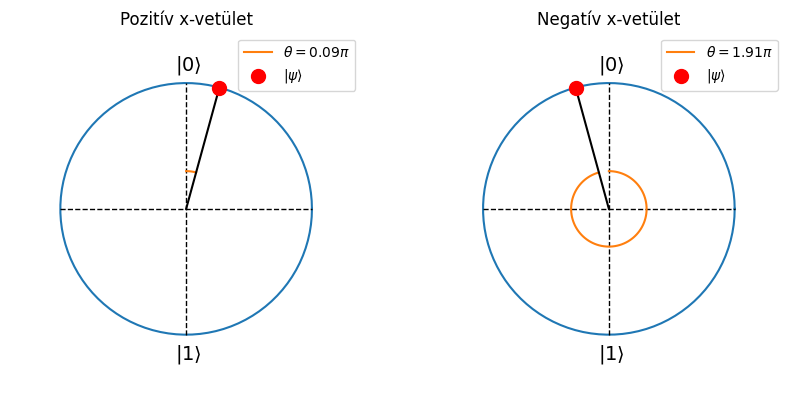

In [9]:
#ezzel leszűkítettük, hogy a keresett állapotot vagy theta_guess vagy 2 * pi - theta_guess
qubit_guess1 = Qubit(theta_guess)
qubit_guess2 = Qubit(2 * math.pi - theta_guess)
fig4, ax4 = plt.subplots(1, 2, figsize = (10, 5))
qubit_guess1.visualize(ax = ax4[0], title = "Pozitív x-vetület")
qubit_guess2.visualize(ax = ax4[1], title = "Negatív x-vetület")

In [10]:
#x vetület meghatározása
rotated_qubits = qubits[split:]
for q in rotated_qubits:
    q.rotate(-math.pi/2)
rotated_results = [q.measure() for q in rotated_qubits]
rcount0 = rotated_results.count(0)
rcount1 = rotated_results.count(1)
x_psi = (rcount0 - rcount1) / (N_qubit - split)

In [11]:
if x_psi > 0:
    theta = theta_guess
else:
    theta = 2 * math.pi - theta_guess


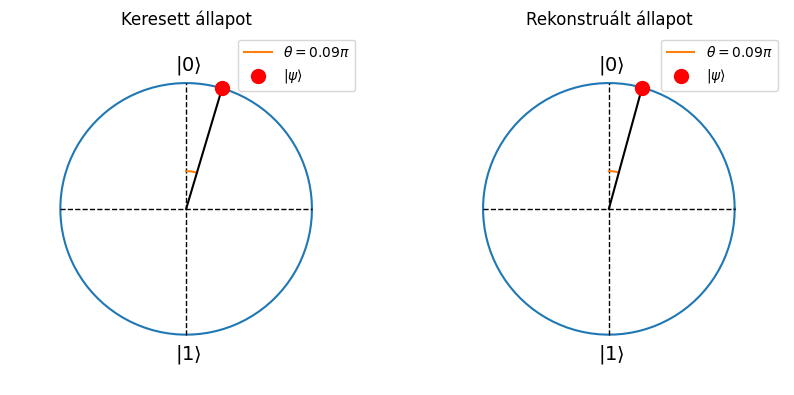

In [12]:
reconstructed_qubit = Qubit(theta)
original_qubit = Qubit(secret_angle)
fig5, ax5 = plt.subplots(1, 2, figsize = (10, 5))
reconstructed_qubit.visualize(ax = ax5[1], title = "Rekonstruált állapot")
original_qubit.visualize(ax = ax5[0], title = "Keresett állapot")